In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 7 environment'ı ortamı kuruyoruz
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [ ]:
!kaggle datasets download -d adammaus/predicting-churn-for-bank-customers

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 70.1MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  predicting-churn-for-bank-customers.zip
  inflating: Churn_Modelling.csv     


In [ ]:
df = pd.read_csv("Churn_Modelling.csv",delimiter=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df_copy = df.copy()


In [ ]:
df_copy["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df_copy=df_copy.drop(columns="Exited")

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
import scipy as sp
import pandas as pd

from sklearn.cluster import KMeans

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#categorical_features, veri tipi ‘object’ olan sütunları seçer.

categorical_features = df_copy.select_dtypes(include=['object']).columns
#numerical_features ise veri tipi ‘float’ veya ‘int’ olan sütunları seçer.

numerical_features = df_copy.select_dtypes(include=['float', 'int']).columns

In [ ]:
#numerical_features ise veri tipi ‘float’ veya ‘int’ olan sütunları seçer.
numerical_transformer = Pipeline(steps=[
    ('scalar', StandardScaler())
])
#categorical_features, veri tipi ‘object’ olan sütunları seçer.
categorical_transformer = Pipeline(steps=[
    ('scalar', OneHotEncoder())
])


# Bu nesne, sayısal ve kategorik özelliklere farklı dönüştürücüler uygulayarak, veri çerçevesini tek bir özellik matrisine dönüştürür.
# transformers parametresi, hangi dönüştürücünün hangi özelliklere uygulanacağını belirtir.
# Örneğin, (‘num’, numerical_transformer, numerical_features) demek, numerical_transformer’ın numerical_features’e uygulanacağı anlamına gelir.
# Aynı şekilde, (‘cat’, categorical_transformer, categorical_features) demek, categorical_transformer’ın categorical_features’e uygulanacağı anlamına gelir.


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

In [ ]:
df_copy = pd.get_dummies(data=df_copy,drop_first=True)
df_copy

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df_copy, "complete")
hc_average = linkage(df_copy, "average")
hc_single = linkage(df_copy, "single")

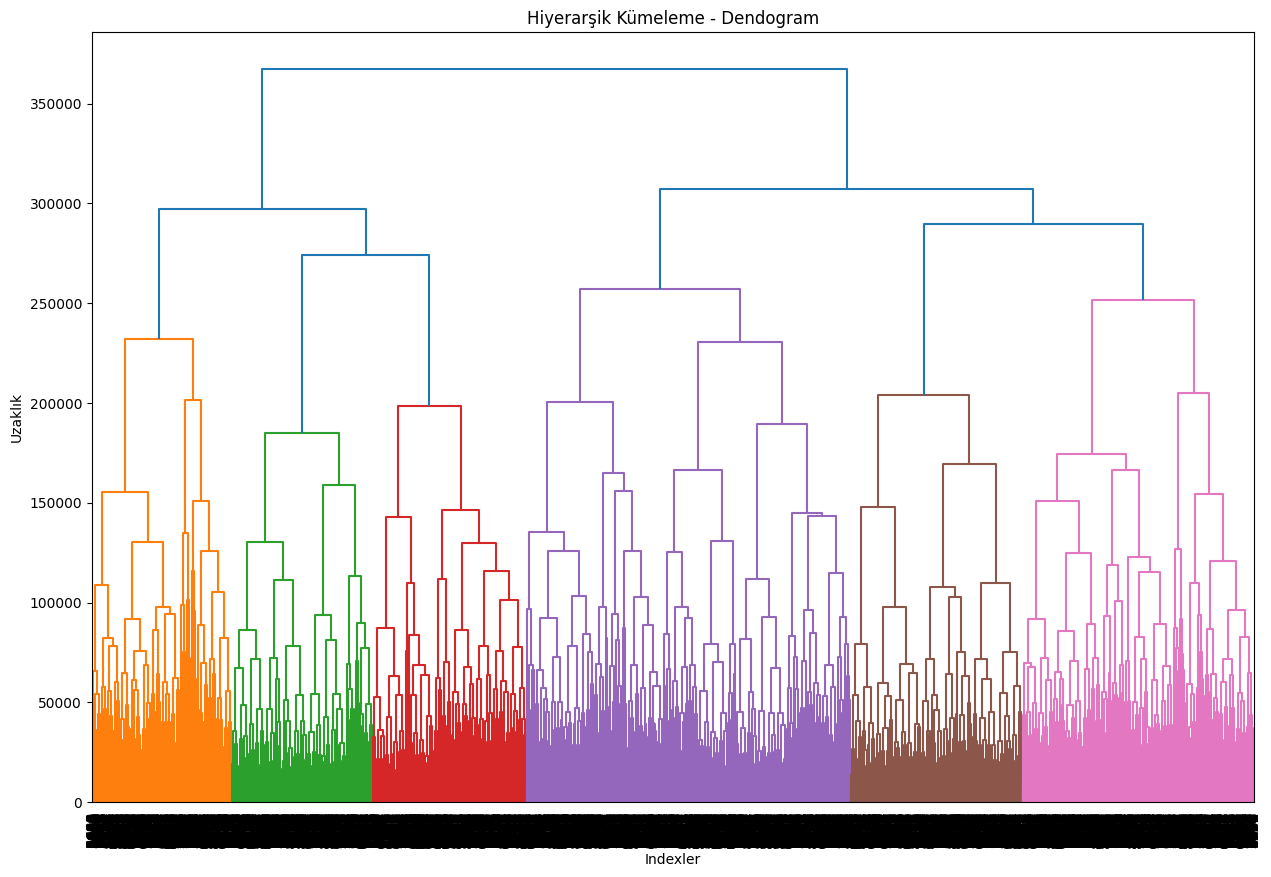

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

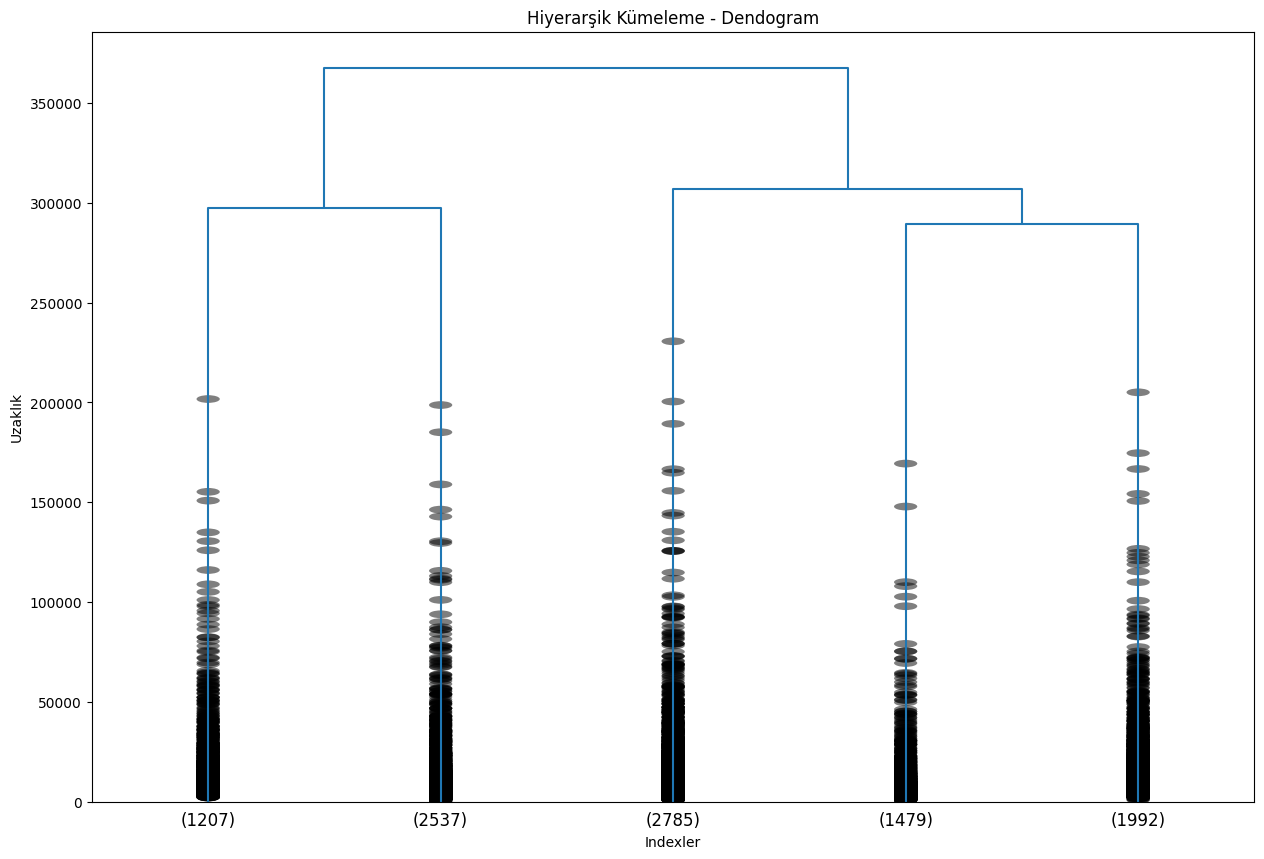

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 5,
    show_contracted = True
);

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2,
                                  affinity = "euclidean",
                                  linkage = "ward")

cluster.fit_predict(df_copy)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
df_copy.head(10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0
5,6,15574012,645,44,8,113755.78,2,1,0,149756.71,...,0,0,0,0,0,0,0,0,1,1
6,7,15592531,822,50,7,0.00,2,1,1,10062.80,...,0,0,0,0,0,0,0,0,0,1
7,8,15656148,376,29,4,115046.74,4,1,0,119346.88,...,0,0,0,0,0,0,0,1,0,0
8,9,15792365,501,44,4,142051.07,2,0,1,74940.50,...,0,0,0,0,0,0,0,0,0,1
9,10,15592389,684,27,2,134603.88,1,1,1,71725.73,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.DataFrame({"Kredi_Notu" : df.CreditScore, "Kumeler": cluster.fit_predict(df_copy)})[0:10]

,Kredi_Notu,Kumeler
0,619,1
1,608,0
2,502,0
3,699,1
4,850,0
5,645,0
6,822,1
7,376,0
8,501,0
9,684,0
